D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


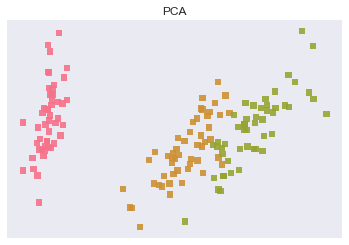

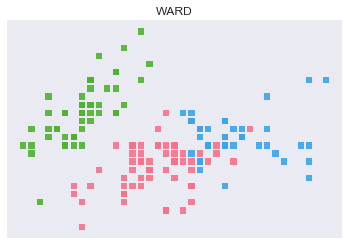

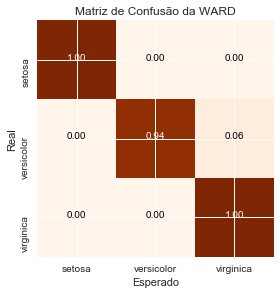

Índice: 0.87


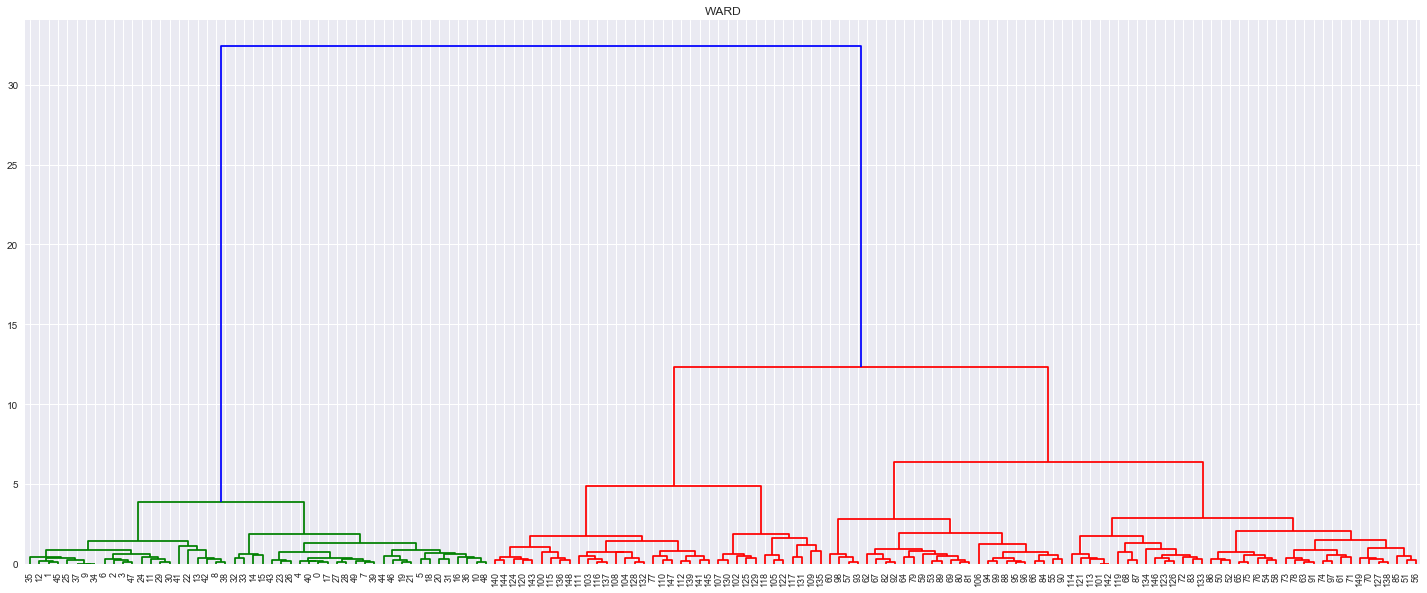

In [2]:
import itertools
import numpy as np
import seaborn as sns
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.cross_validation import train_test_split
% matplotlib inline

#####################################################################################################################

plot_kwds = {'alpha' : 0.9, 's' : 40, 'linewidths':0}

#####################################################################################################################

iris = load_iris()
X = iris.data
y = iris.target
n_samples, n_features = X.shape
target_names = iris.target_names

#####################################################################################################################

plt.figure()
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

palette = sns.color_palette("husl", 8)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in y]
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=colors, marker='s', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('PCA')
plt.show()

#####################################################################################################################

def plot_clusters(data, algorithm, args, kwds):
    labels = algorithm(*args, **kwds).fit_predict(data)
    palette = sns.color_palette('husl', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.scatter(data.T[0], data.T[1], c=colors, marker='s', **plot_kwds)
    plt.title('WARD')
    
#####################################################################################################################

plt.figure()
plot_clusters(X, cluster.AgglomerativeClustering, (), {'n_clusters':3, 'linkage':'ward'})
plt.show()

#####################################################################################################################

def plot_conf_matrix(cm, classes, title):
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', 
                 color='white' if cm[i, j] > thresh else 'Black')

    plt.tight_layout()
    
    plt.ylabel('Real')
    plt.xlabel('Esperado')

#####################################################################################################################

plt.figure()
X_trainW, X_testW, y_trainW, y_testW = train_test_split(X, y, random_state=0)
classifier = svm.SVC(kernel='linear')
y_predW = classifier.fit(X_trainW, y_trainW).predict(X_testW)

cm = confusion_matrix(y_testW, y_predW)

plot_conf_matrix(cm, target_names, 'Matriz de Confusão da WARD')
plt.show()

#####################################################################################################################

plt.figure(figsize=(25, 10))
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
print('Índice: %.2f' % c)
plt.title('WARD')
dendrogram(Z, leaf_rotation=90, leaf_font_size=9.)
plt.show()